# Random Survival Forest

Random Survival Forest is an application of random forests to the case of survival problems (taking into account the censorship). We wanted to try it because it is really robust to overfitting and intrinsically gives importance to relevant features and not others.

We will use the pysurvival package that provides an implementation of random survival forest

In [1]:
from utils import *
import pandas as pd
from pysurvival.models.survival_forest import RandomSurvivalForestModel
from sklearn.model_selection import train_test_split
from pysurvival.utils.metrics import concordance_index
import matplotlib.pyplot as plt

In [7]:
x, y = load_train_dataset()
fillna(x)
x = pd.get_dummies(x, columns=['Histology', 'SourceDataset'])
x.head()

Mstage  Nstage  Tstage      age  original_shape_Compactness1  \
PatientID                                                                 
202             0       0       2  66.0000                     0.027815   
371             0       2       4  64.5722                     0.023015   
246             0       3       2  66.0452                     0.027348   
240             0       2       3  59.3566                     0.026811   
284             0       3       4  71.0554                     0.023691   

           original_shape_Compactness2  original_shape_Maximum3DDiameter  \
PatientID                                                                  
202                           0.274892                         48.559242   
371                           0.188210                         75.703368   
246                           0.265740                         70.434367   
240                           0.255406                         46.818800   
284                           0.199424                         53.795911   

           original_shape_SphericalDisproportion  original_shape_Sphericity  \
PatientID                                                                     
202                                     1.537964                   0.650210   
371                                     1.744961                   0.573079   
246                                     1.555420                   0.642913   
240                                     1.576120                   0.634469   
284                                     1.711620                   0.584242   

           original_shape_SurfaceArea  ...  \
PatientID                              ...   
202                       5431.333210  ...   
371                      10369.568729  ...   
246                      10558.818691  ...   
240                       4221.412123  ...   
284                       5295.900331  ...   

           original_glrlm_LongRunHighGrayLevelEmphasis  \
PatientID                                                
202                                        1651.710761   
371                                        3386.995589   
246                                        4232.418080   
240                                        1844.746046   
284                                        4444.272812   

           Histology_Adenocarcinoma  \
PatientID                             
202                               1   
371                               0   
246                               0   
240                               0   
284                               0   

           Histology_NSCLC NOS (not otherwise specified)  \
PatientID                                                  
202                                                    0   
371                                                    0   
246                                                    0   
240                                                    0   
284                                                    0   

           Histology_Squamous cell carcinoma  Histology_adenocarcinoma  \
PatientID                                                                
202                                        0                         0   
371                                        0                         0   
246                                        0                         0   
240                                        0                         0   
284                                        0                         0   

           Histology_large cell  Histology_nos  \
PatientID                                        
202                           0              0   
371                           1              0   
246                           0              0   
240                           0              1   
284                           0              0   

           Histology_squamous cell carcinoma  SourceDataset_l1  \
PatientID                            

In [9]:
y.head()

SurvivalTime  Event
PatientID                     
202                1378      0
371                 379      1
246                 573      1
240                 959      0
284                2119      0

In [24]:
# We need to seperate SurvivalTime and censorship variables 
T = y['SurvivalTime']
E = y['Event']

In [11]:
x_train, x_test, T_train, T_test, E_train, E_test = train_test_split(x, T, E, test_size = 0.2)

We test multiple values for the number of trees to find out which one is the best

C-index: 0.70 for num_trees=10
C-index: 0.77 for num_trees=20
C-index: 0.73 for num_trees=30
C-index: 0.70 for num_trees=40
C-index: 0.72 for num_trees=50
C-index: 0.62 for num_trees=60
C-index: 0.73 for num_trees=70
C-index: 0.61 for num_trees=80
C-index: 0.72 for num_trees=90
C-index: 0.74 for num_trees=100
C-index: 0.71 for num_trees=110
C-index: 0.69 for num_trees=120
C-index: 0.70 for num_trees=130
C-index: 0.73 for num_trees=140
C-index: 0.73 for num_trees=150
C-index: 0.72 for num_trees=160
C-index: 0.75 for num_trees=170
C-index: 0.71 for num_trees=180
C-index: 0.75 for num_trees=190
C-index: 0.71 for num_trees=200
C-index: 0.72 for num_trees=210
C-index: 0.74 for num_trees=220
C-index: 0.72 for num_trees=230
C-index: 0.75 for num_trees=240
C-index: 0.73 for num_trees=250
C-index: 0.77 for num_trees=260
C-index: 0.72 for num_trees=270
C-index: 0.73 for num_trees=280
C-index: 0.55 for num_trees=290
C-index: 0.70 for num_trees=300
C-index: 0.72 for num_trees=310
C-index: 0.72 for

<function print>

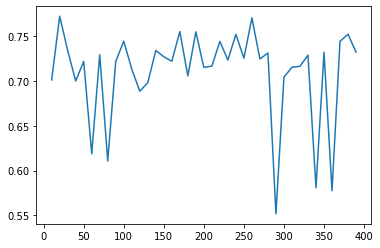

In [16]:
C_indexs = []
for num_trees in range(10, 400, 10):
    model = RandomSurvivalForestModel(num_trees = 10)
    model.fit(x_train, T_train, E_train)
    c_index = concordance_index(model, x_test, T_test, E_test) #0.81
    print('C-index: {:.2f} for num_trees={}'.format(c_index, num_trees))
    C_indexs.append(c_index)

plt.figure()
plt.plot(range(10, 400, 10), C_indexs)
print
## best num_trees~=260

In [17]:
## Training on the whole dataset :
model_final = RandomSurvivalForestModel(num_trees = 260)
model_final.fit(x, T, E)

RandomSurvivalForestModel

### Predictions

In [18]:
test = load_test_dataset()
fillna(test)
test = pd.get_dummies(test, columns=['Histology', 'SourceDataset'])
test.head()

Mstage  Nstage  Tstage      age  original_shape_Compactness1  \
PatientID                                                                 
13              0       0       4  44.3970                     0.028885   
155             0       3       1  63.3183                     0.031948   
404             0       2       2  64.7255                     0.015999   
407             0       0       2  65.3635                     0.031358   
9               0       0       2  50.0000                     0.017815   

           original_shape_Compactness2  original_shape_Maximum3DDiameter  \
PatientID                                                                  
13                            0.296451                        106.901824   
155                           0.362660                         18.814888   
404                           0.090945                        105.080921   
407                           0.349373                         46.968074   
9                             0.112759                         56.542020   

           original_shape_SphericalDisproportion  original_shape_Sphericity  \
PatientID                                                                     
13                                      1.499738                   0.666783   
155                                     1.402276                   0.713126   
404                                     2.223687                   0.449704   
407                                     1.419832                   0.704309   
9                                       2.069901                   0.483115   

           original_shape_SurfaceArea  ...  \
PatientID                              ...   
13                       29085.541425  ...   
155                        629.443640  ...   
404                      12509.265444  ...   
407                       4067.657372  ...   
9                         7093.365690  ...   

           original_glrlm_LongRunHighGrayLevelEmphasis  \
PatientID                                                
13                                         4654.031976   
155                                         639.621963   
404                                        7156.937667   
407                                        4776.549408   
9                                           400.015847   

           Histology_Adenocarcinoma  \
PatientID                             
13                                0   
155                               0   
404                               0   
407                               0   
9                                 1   

           Histology_NSCLC NOS (not otherwise specified)  \
PatientID                                                  
13                                                     0   
155                                                    0   
404                                                    0   
407                                                    0   
9                                                      0   

           Histology_Squamous cell carcinoma  Histology_adenocarcinoma  \
PatientID                                                                
13                                         0                         0   
155                                        0                         1   
404                                        0                         0   
407                                        0                         0   
9                                          0                         0   

           Histology_large cell  Histology_nos  \
PatientID                                        
13                            0              1   
155                           0              0   
404                           1              0   
407                           0              1   
9                             0              0   

           Histology_squamous cell carcinoma  SourceDataset_l1  \
PatientID                            

In [19]:
#pred_risk = model_final.predict_risk(test)
pred_survival = model_final.predict_survival(test)

In [20]:
pred_survival.shape, len(model_final.times)

((125, 278), 278)

In [21]:
pred_survival

array([[1.        , 1.        , 1.        , ..., 0.21607447, 0.21607447,
        0.21607447],
       [0.99976697, 0.99976697, 0.99976697, ..., 0.50414845, 0.50414845,
        0.50414845],
       [0.99872397, 0.99872397, 0.99872397, ..., 0.24112314, 0.24112314,
        0.24112314],
       ...,
       [0.99479621, 0.99479621, 0.99479621, ..., 0.57441041, 0.57441041,
        0.57441041],
       [0.99993536, 0.99993536, 0.99993536, ..., 0.22746702, 0.22746702,
        0.22746702],
       [0.99956825, 0.99956825, 0.99956825, ..., 0.17068202, 0.17068202,
        0.17068202]])

This model returns the probability of surviving depending on time for each patient. To extract the survival time from this information, we decided to select the day at which the patient has less than 50% chance of surviving. 

In [22]:
result = pd.DataFrame(index=test.index.values, columns=['SurvivalTime', 'Event'])
result.index.name = 'PatientID'
ind=0
for p_ind, row in result.iterrows():
    for i, value in enumerate(pred_survival[ind]):
        if value<0.5 or i==pred_survival.shape[1]-1:
            row['SurvivalTime'] = model_final.times[i]
            row['Event'] = 'nan'
            break
    ind+=1
result

SurvivalTime Event
PatientID                   
13               325.0   nan
155             3500.0   nan
404              515.0   nan
407              573.0   nan
9               3500.0   nan
...                ...   ...
66               515.0   nan
132              379.0   nan
169             3500.0   nan
199              539.0   nan
274              456.0   nan

[125 rows x 2 columns]

In [23]:
working_dir = %pwd

result.to_csv(working_dir.replace('/notebooks', '/results/output_random_survival_forest.csv'), float_format='%.13f')

## Results

C_index = 0.688